In [1]:
import projection
import numpy as np
import plot
from plot import plot_mass
import matplotlib.pyplot as plt
import read_chroma
import mass_spec
from pyteomics import mzml, auxiliary
from skimage.feature import peak_local_max
import time
import peak_detection
import benchmark
import matching
from matchms.importing import load_from_mgf
import utils
import importlib
import chromatof
import pybaselines
from scipy import ndimage
from skimage.restoration import estimate_sigma
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy.signal import savgol_filter
import skimage
import os
import read_chroma
import glob
import plot
import mass_spec
import projection
import pyms_nist_search
import pyms
import baseline_correction

In [2]:
STD_PATH = 'F:/Bureau/Elodie_CDF/'

In [3]:
files = glob.glob(STD_PATH + "*.cdf")
files

['F:/Bureau/Elodie_CDF\\818826-etalon-VOC-melange1-split20-2D-d5000-MeOH.cdf',
 'F:/Bureau/Elodie_CDF\\818829-etalon-VOC-melange2-split20-2D-d5000-MeOH.cdf',
 'F:/Bureau/Elodie_CDF\\818830-etalon-VOC-tous-23-stds-split20-2D-d5000-MeOH.cdf',
 'F:/Bureau/Elodie_CDF\\854528-etalon-VOC-melange3-split20-2D-d5000-MeOH.cdf']

In [29]:
def check_match(match, casnos_present):
    return np.array([databaseid for databaseid in [meta['casno'] for meta in match[:, 1]] if databaseid in casnos_present])

# Melange 2

In [4]:
chromato_mg_2_hexenal_obj = read_chroma.read_chroma(files[1])

In [5]:
chromato_m2,time_rn,spectra_obj_m2 = chromato_mg_2_hexenal_obj

In [6]:
full_spectra_m2 = mass_spec.read_full_spectra_centroid(spectra_obj=spectra_obj_m2)

--- 275.76377272605896 seconds --- to compute full spectra centroid


In [8]:
chromato_no_bl_m2 = baseline_correction.chromato_no_baseline(chromato_m2)
chromato_cube_m2 = read_chroma.full_spectra_to_chromato_cube(full_spectra=full_spectra_m2, spectra_obj=spectra_obj_m2)
chromato_cube_m2 = np.array(baseline_correction.chromato_cube_corrected_baseline(chromato_cube_m2))

In [9]:
sigma = estimate_sigma(chromato_no_bl_m2, channel_axis=None)
MIN_SEUIL = 5 * sigma * 100 / np.max(chromato_no_bl_m2)
print(MIN_SEUIL)
coordinates_m2 = peak_detection.peak_detection(chromato_obj=(chromato_no_bl_m2, time_rn, spectra_obj_m2), spectra=None, chromato_cube=chromato_cube_m2, seuil=MIN_SEUIL, ABS_THRESHOLDS=None)
len(coordinates_m2)

0.003401775263913389


729

In [139]:
importlib.reload(matching)

<module 'matching' from 'c:\\Users\\Stan\\pic\\matching.py'>

In [143]:
matches_m2 = matching.matching_nist_lib_from_chromato_cube((chromato_m2, time_rn, spectra_obj_m2), chromato_cube_m2, coordinates_m2, mod_time = 1.25, hit_prob_min=0, match_factor_min=900)
chromato_cd_m2 = projection.matrix_to_chromato(coordinates_m2,time_rn, 1.25, chromato_m2.shape)
casnos_dict2 = (utils.get_name_dict(matches_m2))

c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �-Nonanone: [-31].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �,�-Octadiene: [-32, -22].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string cis-�,�-Hexylenic aldehyde: [-31, -25].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123:

nb peaks:
729


c:\Users\Stan\pic\matching.py:73: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(match)


In [144]:
print(casnos_dict2['2-Hexenal'])
hexenal_cd = casnos_dict2['2-Hexenal'][0]
hexenal_cd

[[15.131527727254097, 0.8534136546184738]]


[15.131527727254097, 0.8534136546184738]

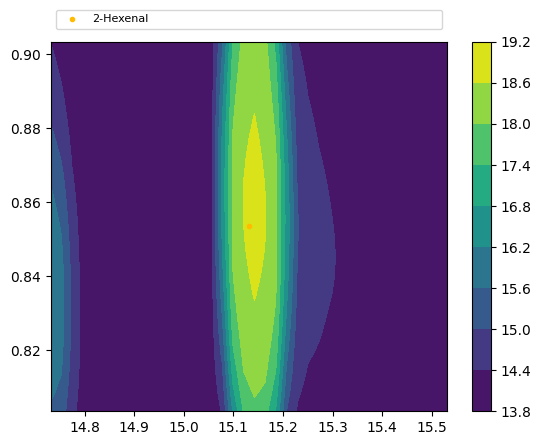

In [147]:
plot.visualizer(chromato_obj=(chromato_m2, time_rn), mod_time=1.25, points=chromato_cd_m2, casnos_dict=casnos_dict2, log_chromato=True, rt1_window=0.4, rt2_window=0.05, rt1=hexenal_cd[0], rt2=hexenal_cd[1])

# Melange 3

In [15]:
chromato_mg_3_cyclohexanone_obj = read_chroma.read_chroma(files[3])
chromato_m3,time_rn,spectra_obj_m3 = chromato_mg_3_cyclohexanone_obj
full_spectra_m3 = mass_spec.read_full_spectra_centroid(spectra_obj=spectra_obj_m3)
chromato_no_bl_m3 = baseline_correction.chromato_no_baseline(chromato_m3)
chromato_cube_m3 = read_chroma.full_spectra_to_chromato_cube(full_spectra=full_spectra_m3, spectra_obj=spectra_obj_m3)
chromato_cube_m3 = np.array(baseline_correction.chromato_cube_corrected_baseline(chromato_cube_m3))
sigma = estimate_sigma(chromato_no_bl_m3, channel_axis=None)
MIN_SEUIL = 5 * sigma * 100 / np.max(chromato_no_bl_m3)
print(MIN_SEUIL)
coordinates_m3 = peak_detection.peak_detection(chromato_obj=(chromato_no_bl_m3, time_rn, spectra_obj_m3), spectra=None, chromato_cube=chromato_cube_m3, seuil=MIN_SEUIL, ABS_THRESHOLDS=None)
len(coordinates_m3)

In [161]:
matches_m3 = matching.matching_nist_lib_from_chromato_cube((chromato_m3, time_rn, spectra_obj_m3), chromato_cube_m3, coordinates_m3, mod_time = 1.25, hit_prob_min=0, match_factor_min=900)
chromato_cd_m3 = projection.matrix_to_chromato(coordinates_m3,time_rn, 1.25, chromato_m3.shape)
casnos_dict3 = (utils.get_name_dict(matches_m3))

c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �-Methyltoluene: [-32].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �-Methylcyclopentanone: [-32].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string Furan, �-ethyl-: [-32].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWa

nb peaks:
852


c:\Users\Stan\pic\matching.py:73: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(match)


In [165]:
print(casnos_dict3['Cyclopentanone, 2-methyl-'])
cyclopentanone_cd = casnos_dict3['Cyclopentanone, 2-methyl-'][0]
cyclopentanone_cd

[[16.798964620334228, 0.9487951807228916]]


[16.798964620334228, 0.9487951807228916]

In [68]:
print(casnos_dict3['Cyclohexanone'])
cyclohexanone_cd = casnos_dict3['Cyclohexanone'][0]
cyclohexanone_cd

[[16.027775057284668, 0.963855421686747]]


[16.027775057284668, 0.963855421686747]

In [ ]:
melange3_names = ["2-ethylfuran","ethylbenzene","4-heptanone","cyclohexanone","2,4-hexadiene"]
melange3_casnos = ["3208-16-0", "100-41-4", "123-19-3", "108-94-1", "592-46-1"]
len(melange3_names), len(melange3_casnos)

c:\Users\Stan\pic\plot.py:383: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')
c:\Users\Stan\pic\plot.py:383: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')


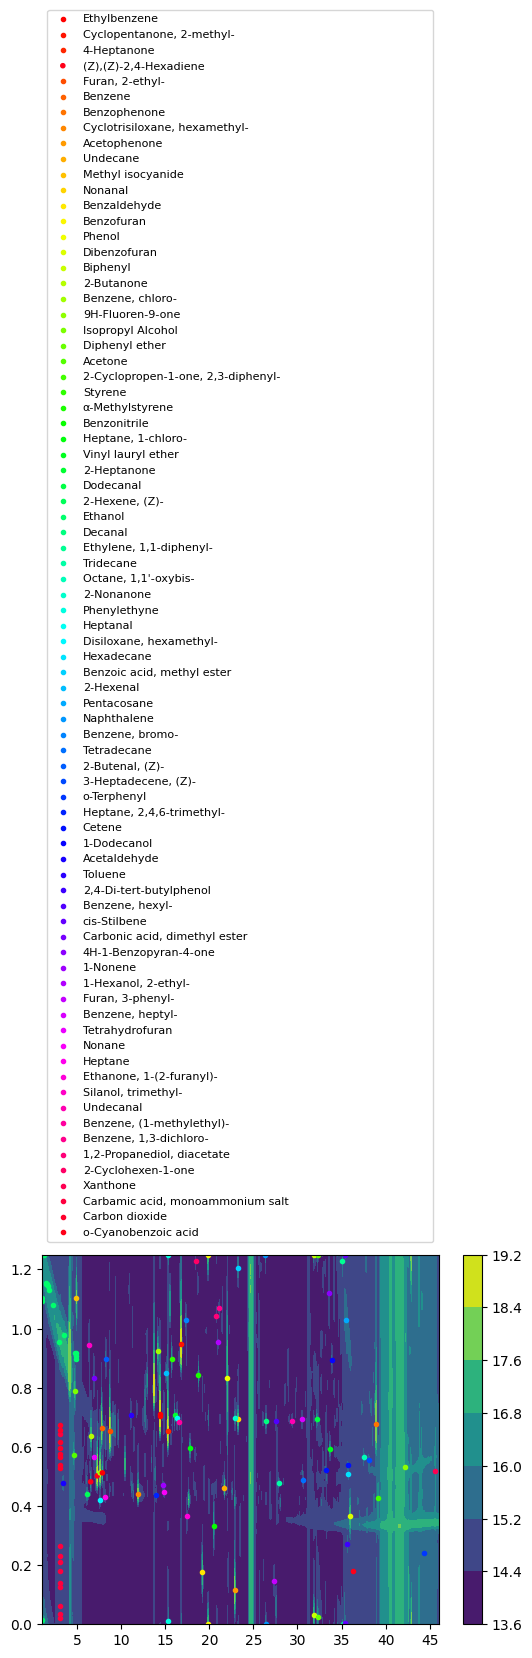

In [163]:
plot.visualizer(chromato_obj=(chromato_m3, time_rn), mod_time=1.25, points=chromato_cd_m3, casnos_dict=casnos_dict3, log_chromato=True)

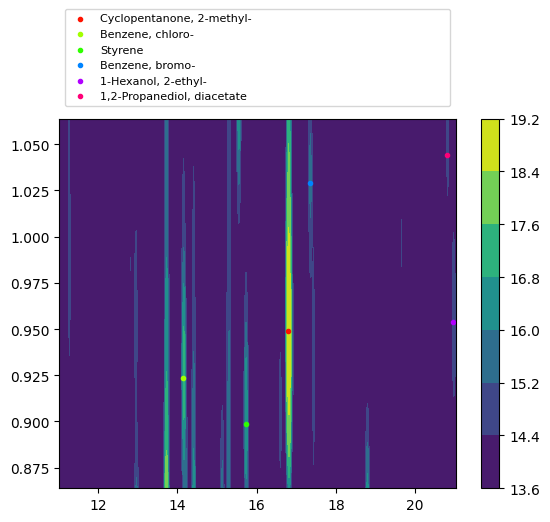

In [164]:
plot.visualizer(chromato_obj=(chromato_m3, time_rn), mod_time=1.25, points=chromato_cd_m3, casnos_dict=casnos_dict3, log_chromato=True, rt1=cyclohexanone_cd[0], rt2=cyclohexanone_cd[1])

# COVID chroma

In [46]:
PATH = 'F:/Bureau/032023-data-Tenax-VOC-COVID/'

In [47]:
files = glob.glob(PATH + "*.cdf")
files

['F:/Bureau/032023-data-Tenax-VOC-COVID\\801850-A-C-01-157-split10.cdf',
 'F:/Bureau/032023-data-Tenax-VOC-COVID\\802111-P-M-01-158-split10.cdf',
 'F:/Bureau/032023-data-Tenax-VOC-COVID\\802115-A-Y-01-152-split10.cdf',
 'F:/Bureau/032023-data-Tenax-VOC-COVID\\802116-S-S-01-154-split10.cdf',
 'F:/Bureau/032023-data-Tenax-VOC-COVID\\802118-P-W-01-149-split10.cdf',
 'F:/Bureau/032023-data-Tenax-VOC-COVID\\817811-B-F-01-156-split10.cdf',
 'F:/Bureau/032023-data-Tenax-VOC-COVID\\817815-A-A-01-151-split10.cdf',
 'F:/Bureau/032023-data-Tenax-VOC-COVID\\817824-C-A-01-150-split10.cdf',
 'F:/Bureau/032023-data-Tenax-VOC-COVID\\817837-C-H-01-155-split10.cdf',
 'F:/Bureau/032023-data-Tenax-VOC-COVID\\817840-D-I-01-153-split10.cdf']

In [48]:
chromato_list = []
chromato=None
time_rn=None
spectra_obj=None
for i, file in enumerate(files):
    print(file)
    chromato_ref_obj = read_chroma.read_chroma(file, 1.25)
    if (i == 0):
        chromato, time_rn, spectra_obj = chromato_ref_obj
    chromato_list.append(chromato_ref_obj[0])

F:/Bureau/032023-data-Tenax-VOC-COVID\801850-A-C-01-157-split10.cdf
F:/Bureau/032023-data-Tenax-VOC-COVID\802111-P-M-01-158-split10.cdf
F:/Bureau/032023-data-Tenax-VOC-COVID\802115-A-Y-01-152-split10.cdf
F:/Bureau/032023-data-Tenax-VOC-COVID\802116-S-S-01-154-split10.cdf
F:/Bureau/032023-data-Tenax-VOC-COVID\802118-P-W-01-149-split10.cdf
F:/Bureau/032023-data-Tenax-VOC-COVID\817811-B-F-01-156-split10.cdf
F:/Bureau/032023-data-Tenax-VOC-COVID\817815-A-A-01-151-split10.cdf
F:/Bureau/032023-data-Tenax-VOC-COVID\817824-C-A-01-150-split10.cdf
F:/Bureau/032023-data-Tenax-VOC-COVID\817837-C-H-01-155-split10.cdf
F:/Bureau/032023-data-Tenax-VOC-COVID\817840-D-I-01-153-split10.cdf


In [71]:
#chromato, time_rn, spectra_obj = chromato_ref_obj_list[0]
full_spectra = mass_spec.read_full_spectra_centroid(spectra_obj=spectra_obj)
spectra, debuts, fins = full_spectra

--- 330.58890867233276 seconds --- to compute full spectra centroid


In [76]:
chromato_no_bl = baseline_correction.chromato_no_baseline(chromato)

In [72]:
chromato_cube = read_chroma.full_spectra_to_chromato_cube(full_spectra=full_spectra, spectra_obj=spectra_obj)
chromato_cube = np.array(baseline_correction.chromato_cube_corrected_baseline(chromato_cube))

In [73]:
(l1, l2, mv, iv, range_min, range_max) = spectra_obj
mass_values = np.linspace(range_min, range_max, range_max - range_min + 1).astype(int)

In [74]:
search = pyms_nist_search.Engine(
                    "C:/NIST14/MSSEARCH/mainlib/",
                    pyms_nist_search.NISTMS_MAIN_LIB,
                    "C:/Users/Stan/Test",
                    )

# 2-Hexenal

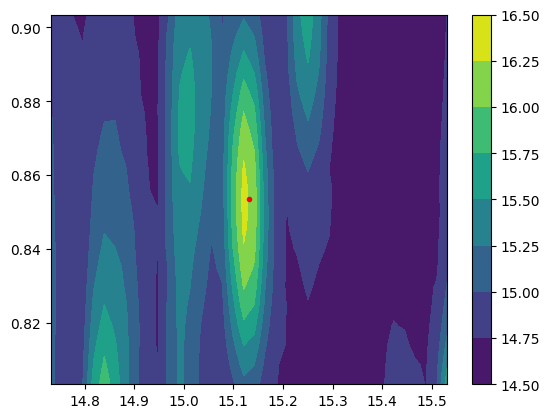

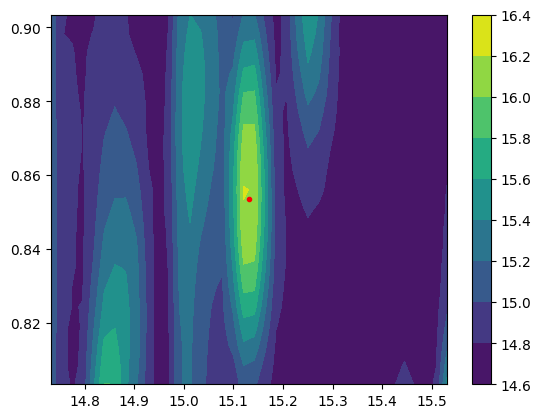

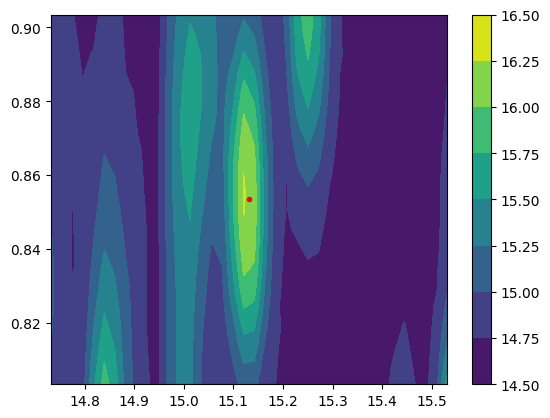

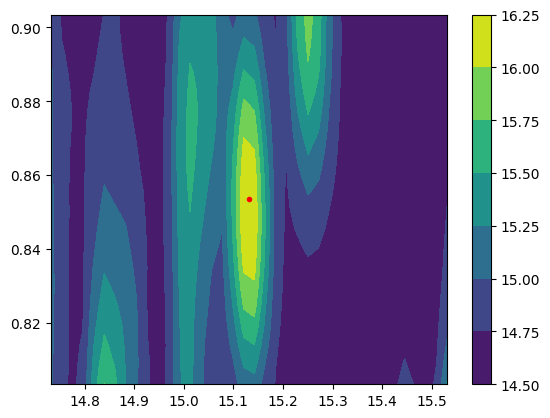

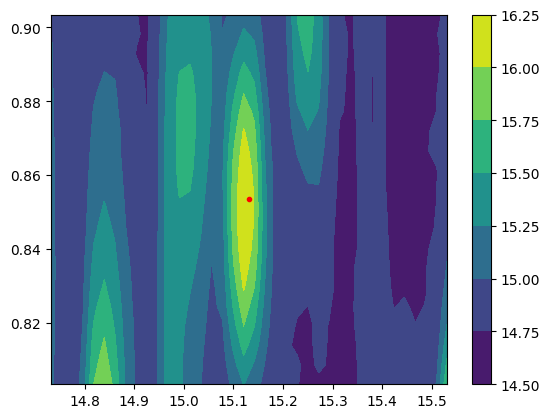

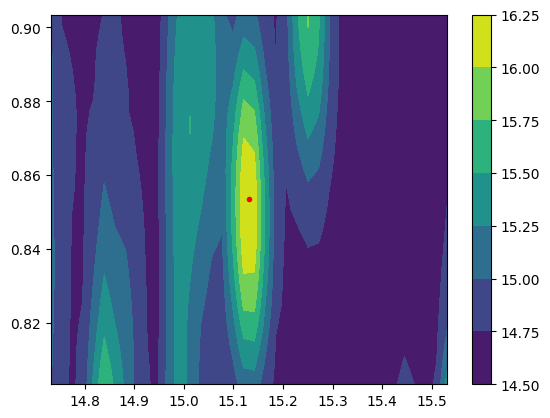

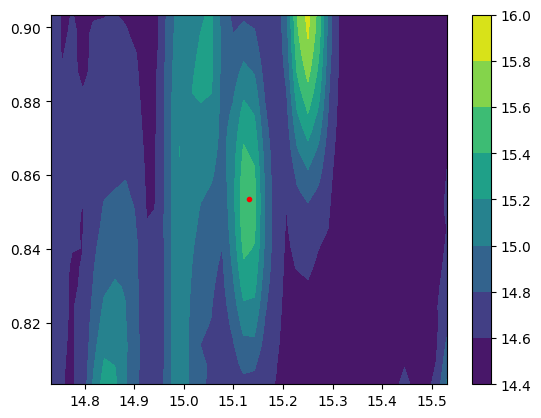

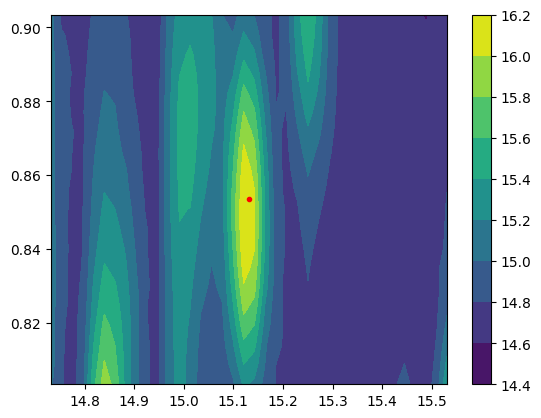

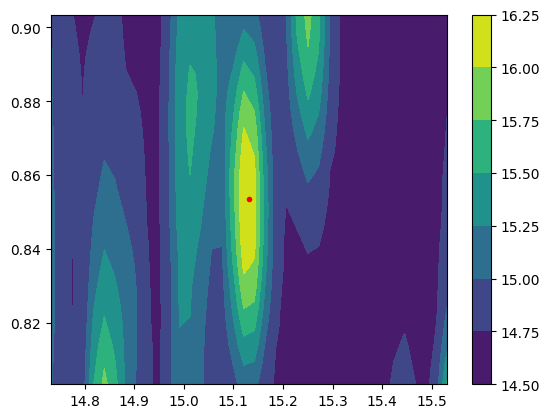

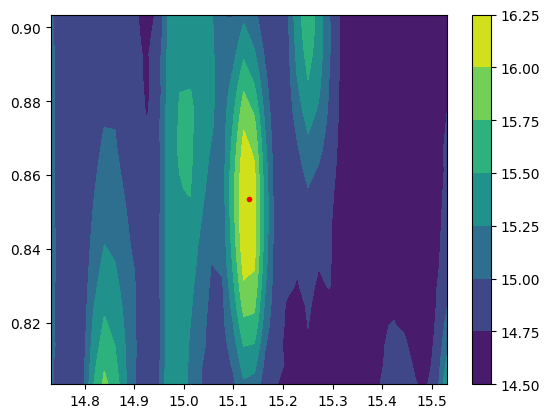

In [67]:
for chroma in chromato_list:
    plot.visualizer((chroma, time_rn), log_chromato=True, rt1=hexenal_cd[0], rt2=hexenal_cd[1], rt1_window=0.4, rt2_window=0.05, points=np.array([hexenal_cd]))

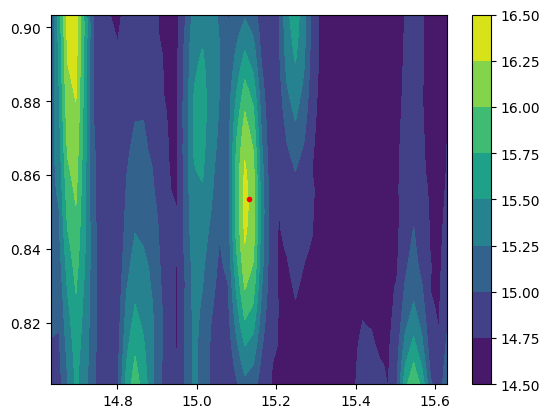

In [54]:
plot.visualizer((chromato, time_rn), log_chromato=True, rt1=hexenal_cd[0], rt2=hexenal_cd[1], rt1_window=0.5, rt2_window=0.05, points=np.array([hexenal_cd]))

In [11]:
u1 = projection.chromato_to_matrix(np.array([[15.1, 0.85]]), time_rn, 1.25, chromato.shape)
u2 = projection.chromato_to_matrix(np.array([[15.13, 0.85]]), time_rn, 1.25, chromato.shape)
u1, u2


(array([[676, 169]]), array([[678, 169]]))

In [12]:
i1 = mass_spec.read_spectrum_from_chromato_cube(u1[0], chromato_cube)

In [13]:
i2 = mass_spec.read_spectrum_from_chromato_cube(u2[0], chromato_cube)

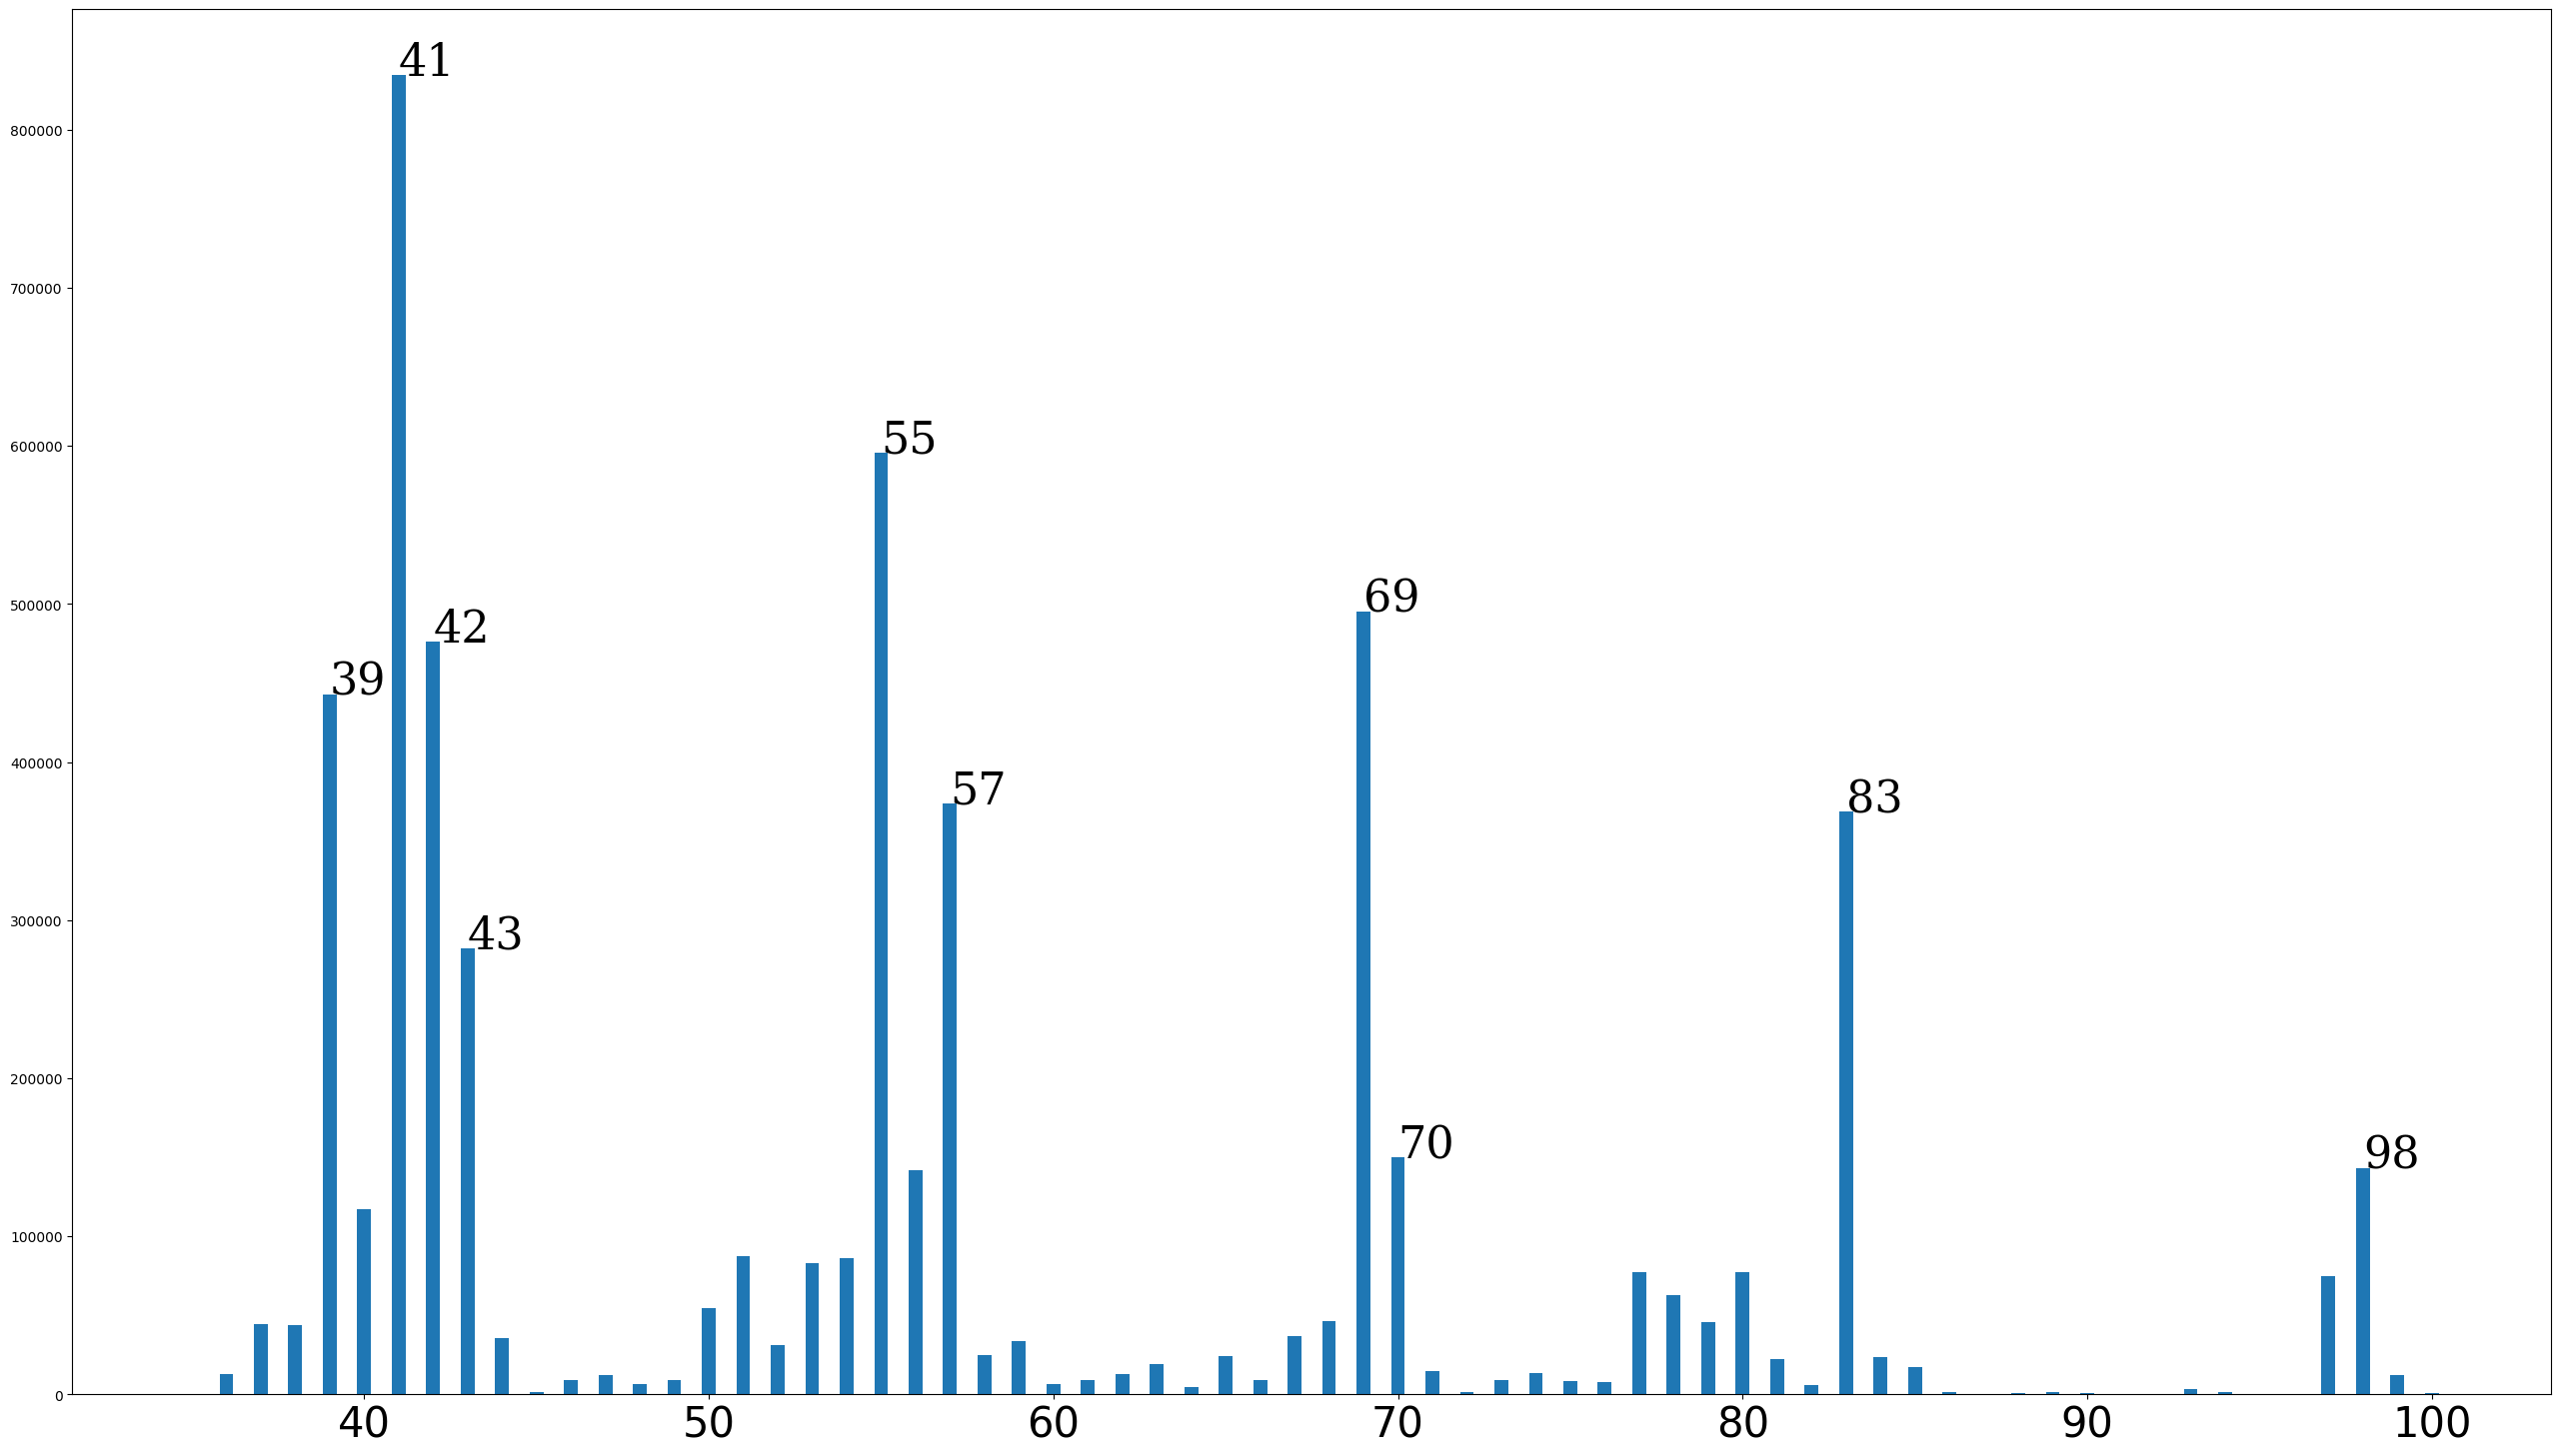

In [14]:
plot.plot_mass(mass_values[:100 + 1 - mass_values[0]], i1[:100 + 1 - mass_values[0]])

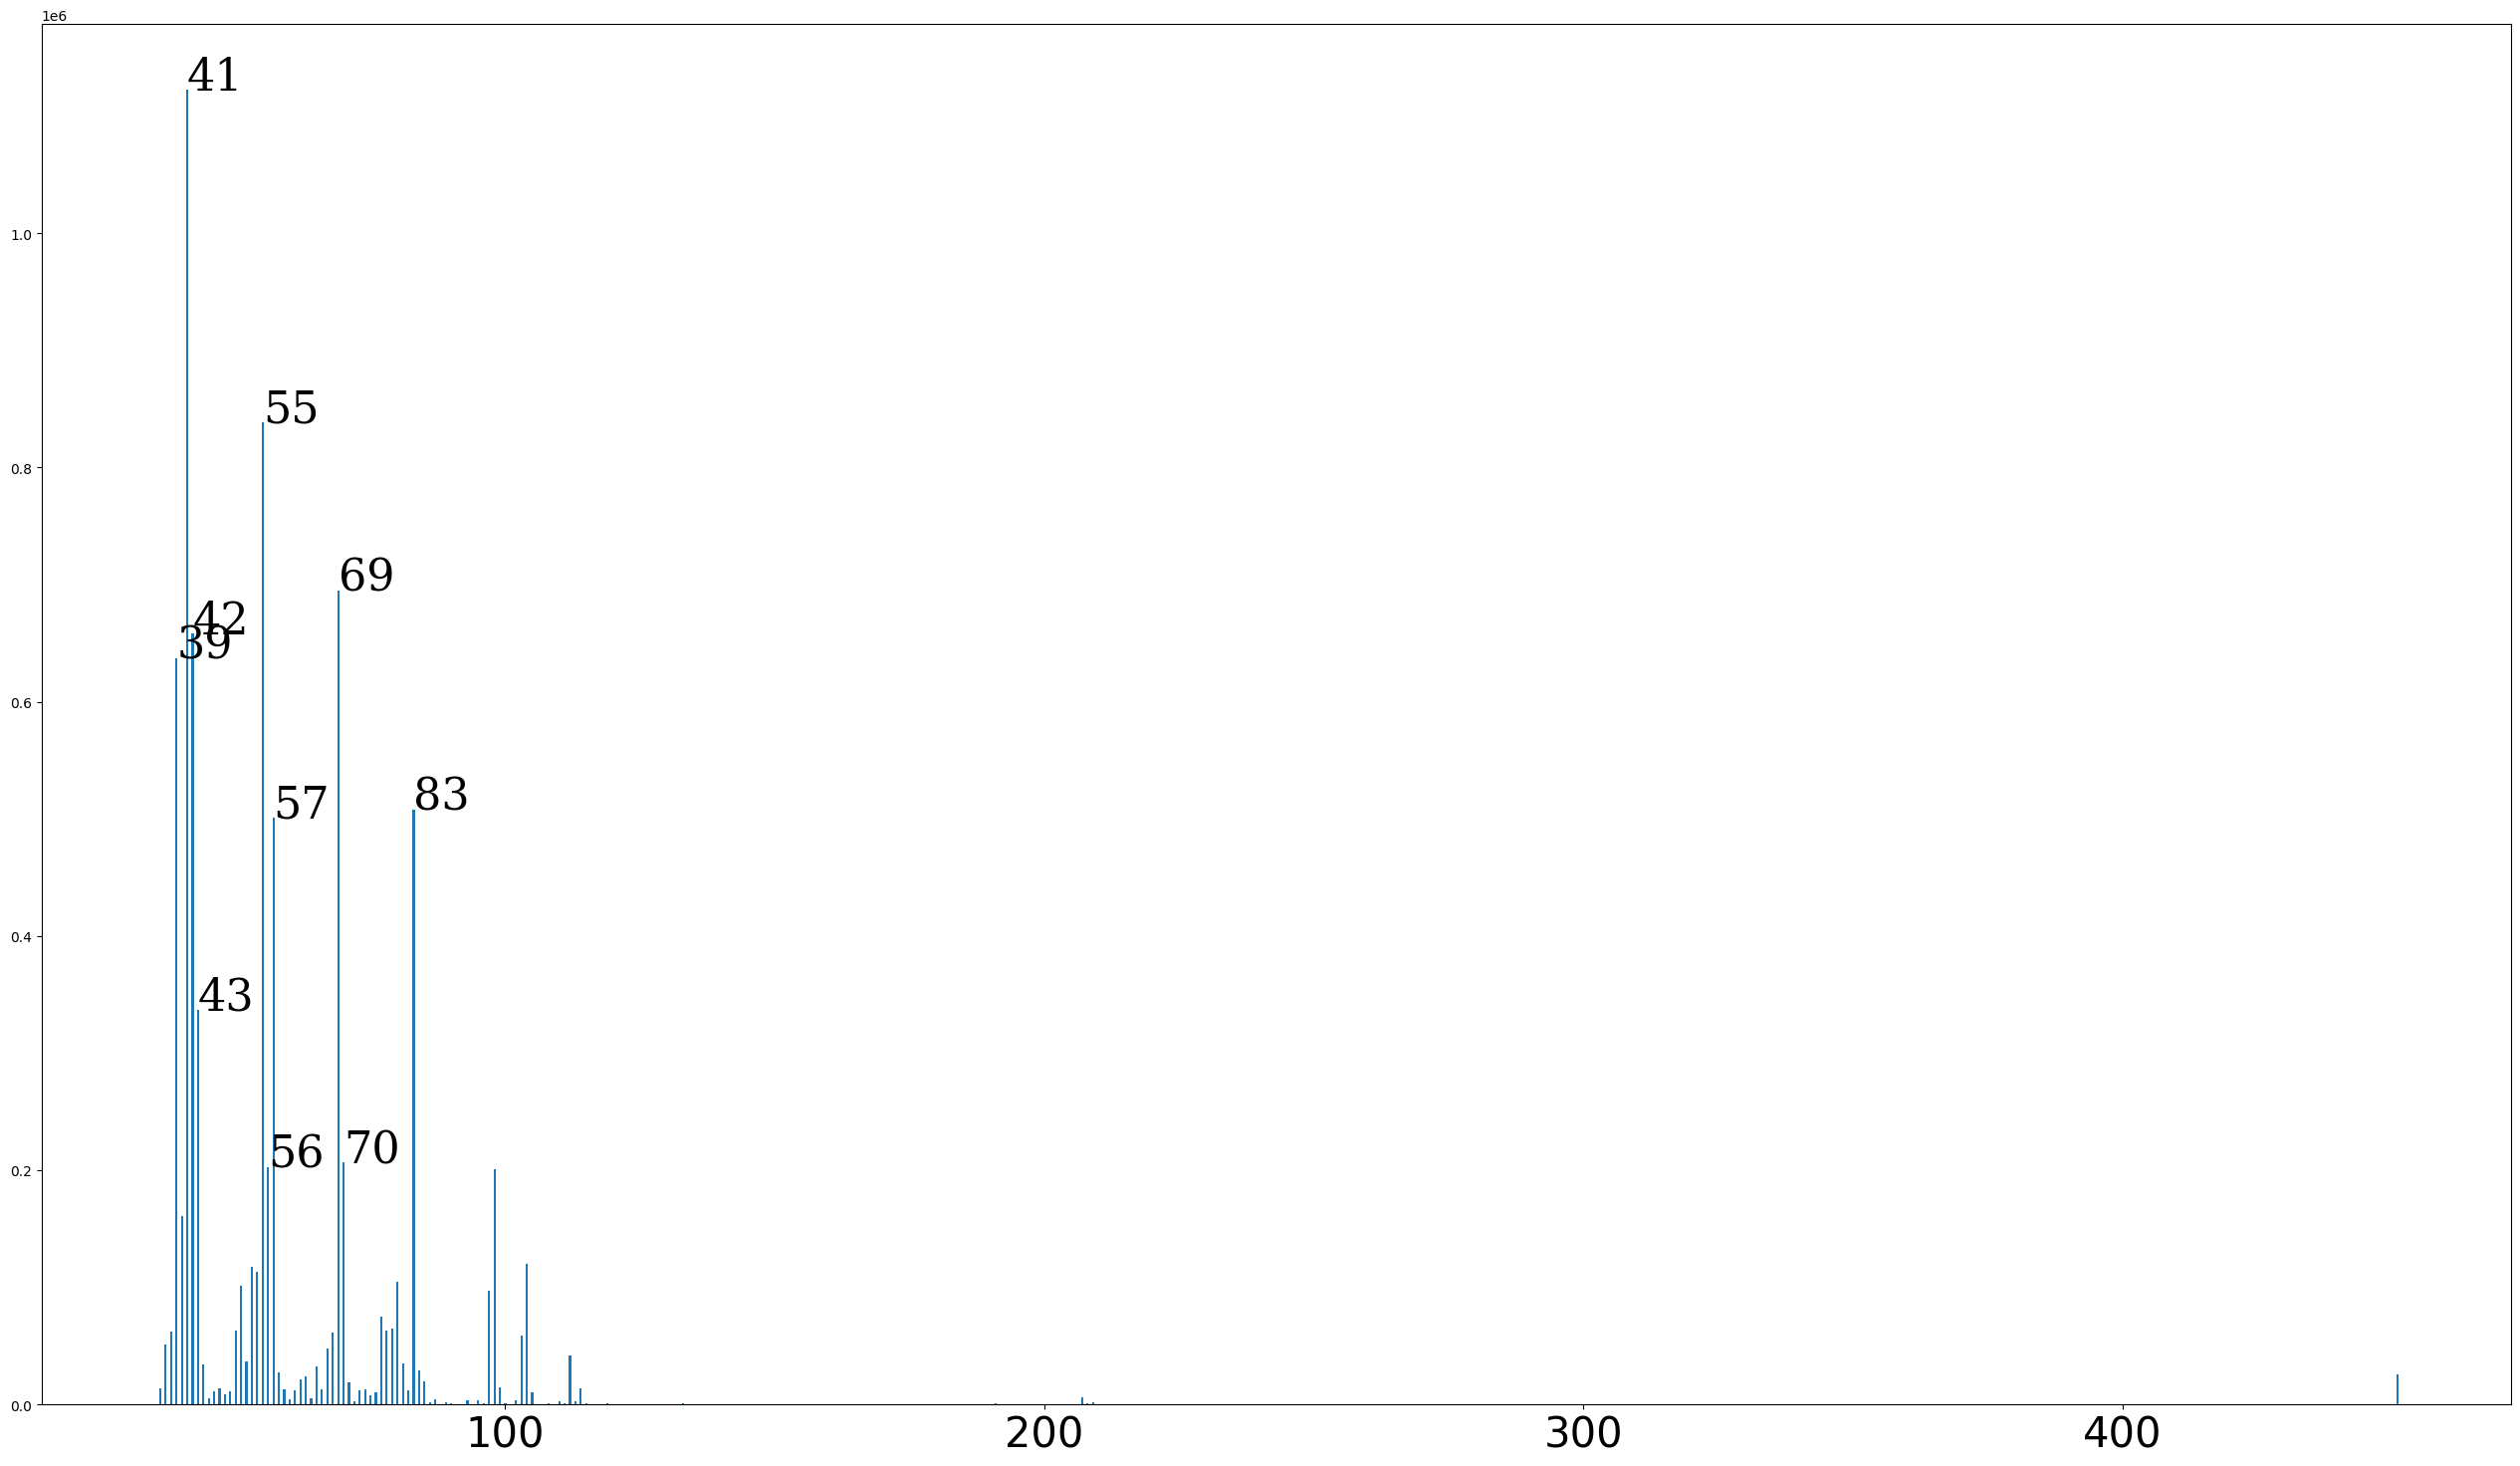

In [15]:
plot.plot_mass(mass_values, i2)

In [16]:
mass_spectrum = pyms.Spectrum.MassSpectrum(mass_values, i1)

In [17]:
res = search.full_search_with_ref_data(mass_spectrum)

c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string cis-�,�-Hexylenic aldehyde: [-31, -25].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")


In [18]:
res

[(Search Result: 2-Hexenal 	(809), Reference Data: 2-Hexenal 	(505-57-7)),
 (Search Result: 2-Hexenal, (E)- 	(799),
  Reference Data: 2-Hexenal, (E)- 	(6728-26-3)),
 (Search Result: 2-Ethyl-3-vinyloxirane 	(772),
  Reference Data: 2-Ethyl-3-vinyloxirane 	(34485-78-4)),
 (Search Result: Hexahydro-1,3-benzodioxol-2-one 	(771),
  Reference Data: Hexahydro-1,3-benzodioxol-2-one 	(4389-22-4)),
 (Search Result: 3-Hexenal, (Z)- 	(759),
  Reference Data: 3-Hexenal, (Z)- 	(6789-80-6))]

In [19]:
compound_casno = res[0][0].cas
compound_name = res[0][0].name
compound_formula = res[0][1].formula
hit_prob = res[0][0].hit_prob
match_factor = res[0][0].match_factor
reverse_match_factor = res[0][0].reverse_match_factor
compound_casno, compound_name, compound_formula, hit_prob, match_factor, match_factor, reverse_match_factor

('505-57-7', '2-Hexenal', 'C6H10O', 33.69, 809, 809, 890)

In [20]:
hit_prob

33.69

In [21]:
match_factor, reverse_match_factor

(809, 890)

# Cyclohexanone


## Plot chromatos centered on cyclohexanone_cd

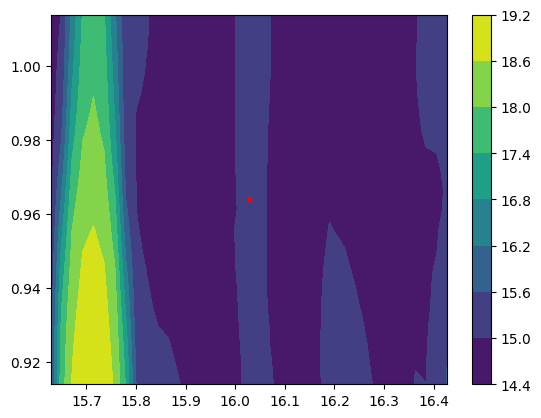

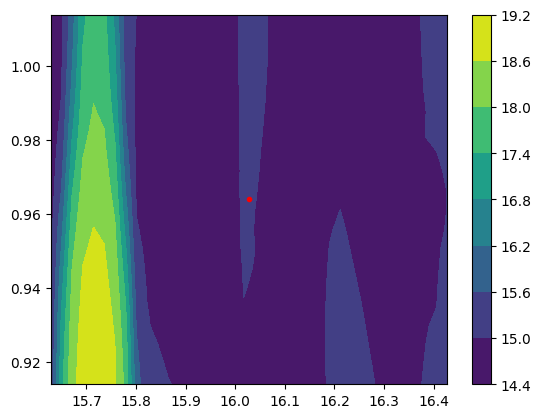

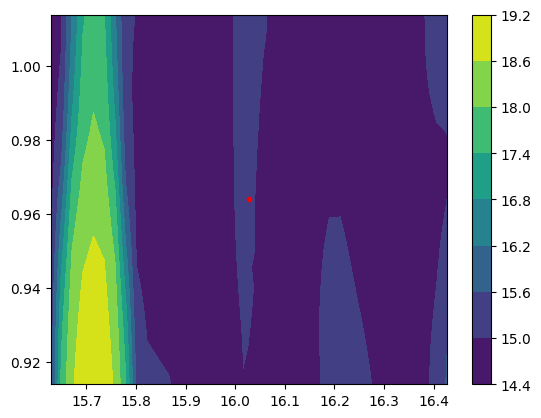

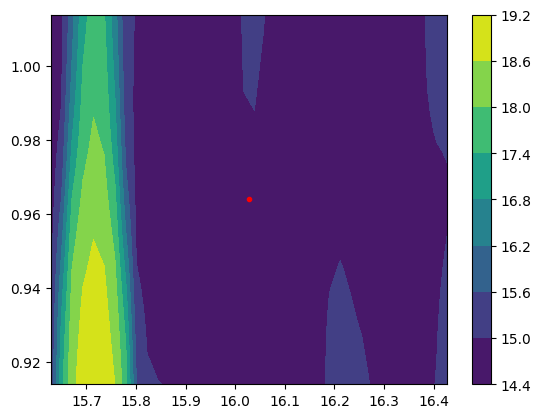

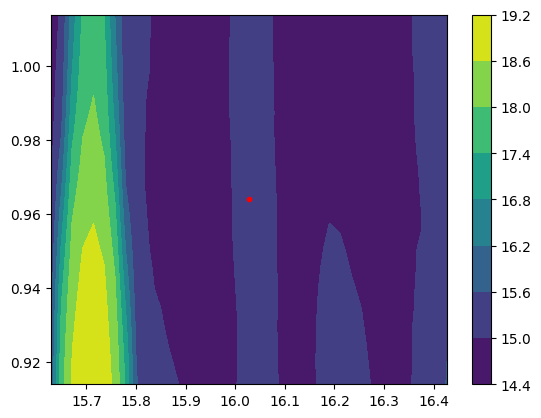

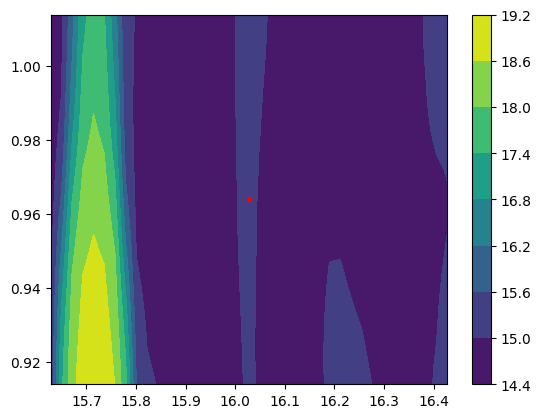

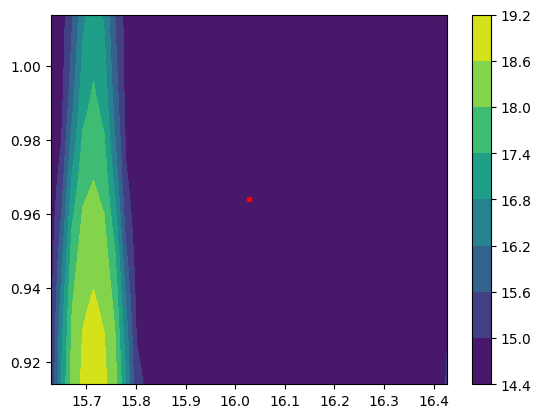

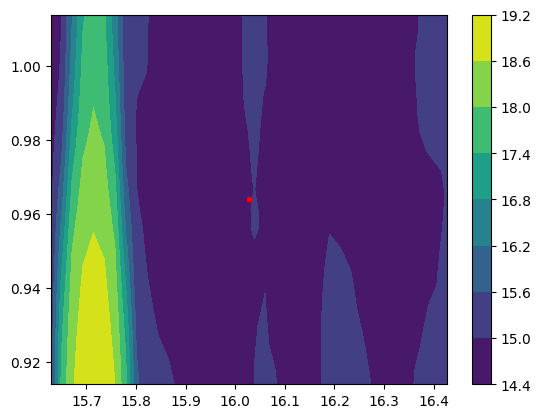

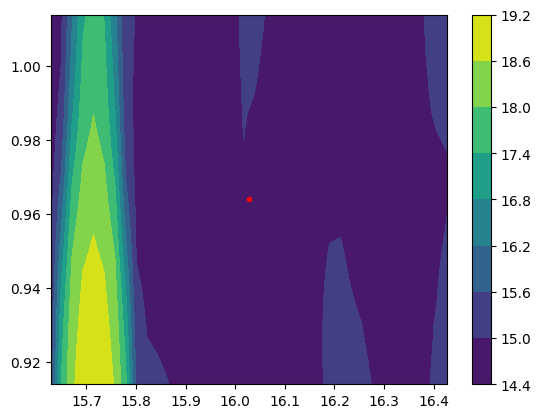

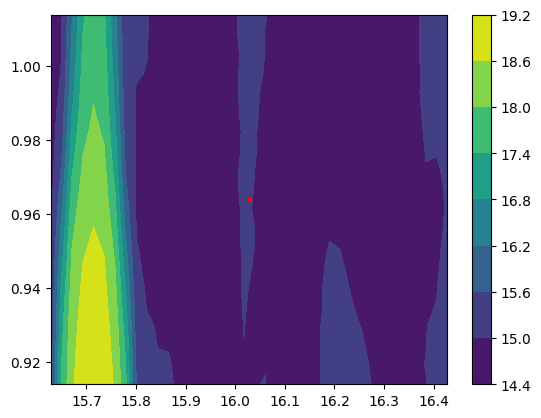

In [134]:
for chroma in chromato_list:
    plot.visualizer((chroma, time_rn), log_chromato=True, rt1=cyclohexanone_cd[0], rt2=cyclohexanone_cd[1],  rt1_window=0.4, rt2_window=0.05, points=np.array([cyclohexanone_cd]))

## Find peaks in the first covid chromato

### Find peaks

In [77]:
sigma = estimate_sigma(chromato_no_bl, channel_axis=None)
MIN_SEUIL = 5 * sigma * 100 / np.max(chromato_no_bl)
print(MIN_SEUIL)
coordinates = peak_detection.peak_detection(chromato_obj=(chromato_no_bl, time_rn, spectra_obj_m3), spectra=None, chromato_cube=chromato_cube, seuil=MIN_SEUIL, ABS_THRESHOLDS=None)
len(coordinates)

0.01654923768716352


1188

In [78]:
matches = matching.matching_nist_lib_from_chromato_cube((chromato, time_rn, spectra_obj_m2), chromato_cube, coordinates, mod_time = 1.25, hit_prob_min=0)
chromato_cd = projection.matrix_to_chromato(coordinates,time_rn, 1.25, chromato.shape)
casnos_dict = (utils.get_name_dict(matches))

c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �-Aminoacetophenone: [-22].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �-(Ethylthio)-acetophenone: [-32].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �-(Ethylthio)acetophenone: [-32].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\ut

nb peaks:
1188


c:\Users\Stan\pic\matching.py:73: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(match)


### Vizu

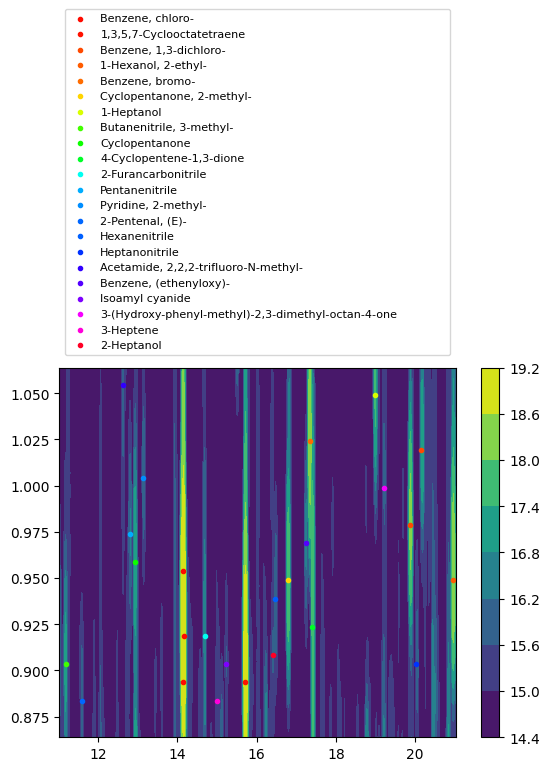

In [151]:
plot.visualizer(chromato_obj=(chromato, time_rn), mod_time=1.25, points=chromato_cd, casnos_dict=casnos_dict, log_chromato=True, rt1=cyclohexanone_cd[0], rt2=cyclohexanone_cd[1])

In [82]:
casnos_dict['Cyclohexanone']

KeyError: 'Cyclohexanone'

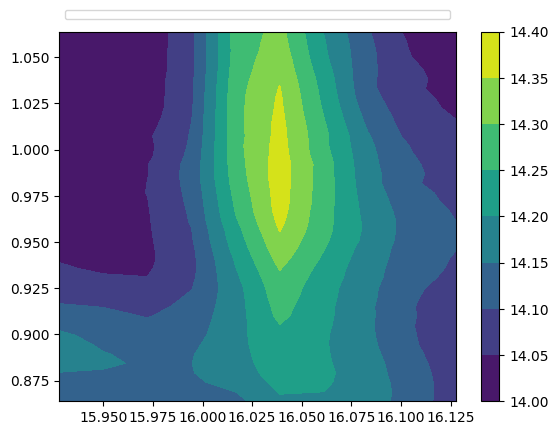

In [152]:
plot.visualizer(chromato_obj=(chromato_m3, time_rn), mod_time=1.25, points=chromato_cd_m3, casnos_dict=casnos_dict3, log_chromato=True, rt1=cyclohexanone_cd[0], rt2=cyclohexanone_cd[1], rt1_window=0.1, rt2_window=0.1)

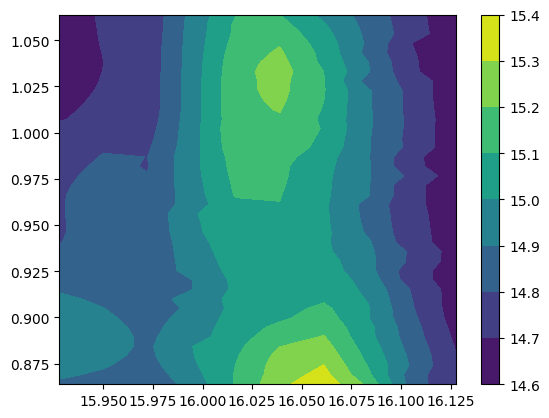

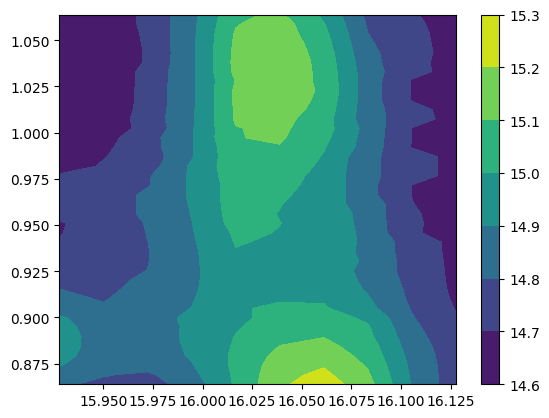

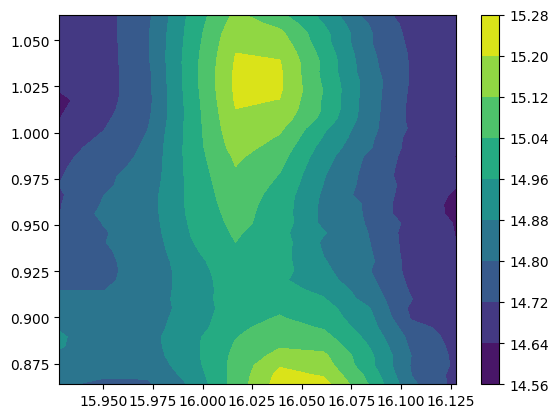

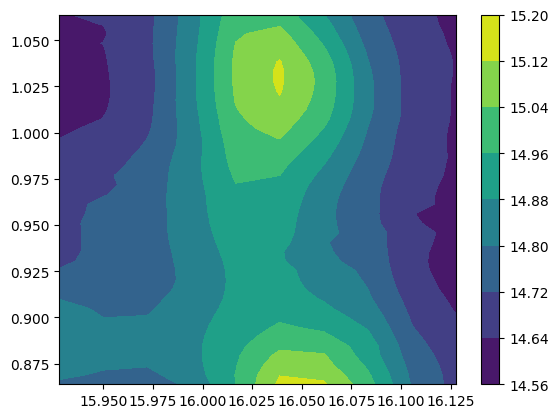

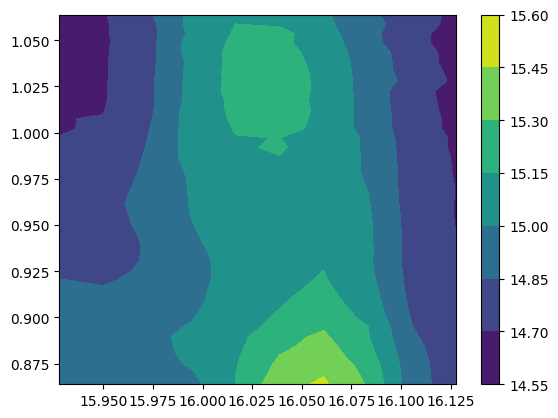

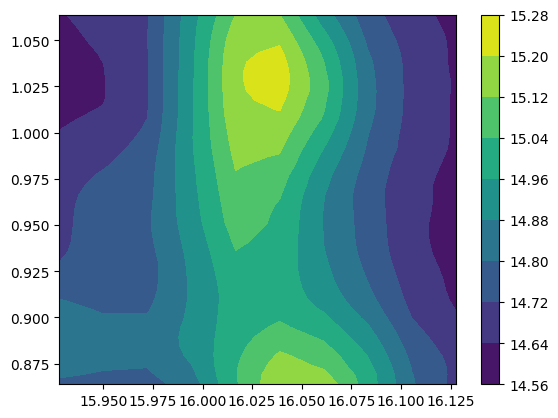

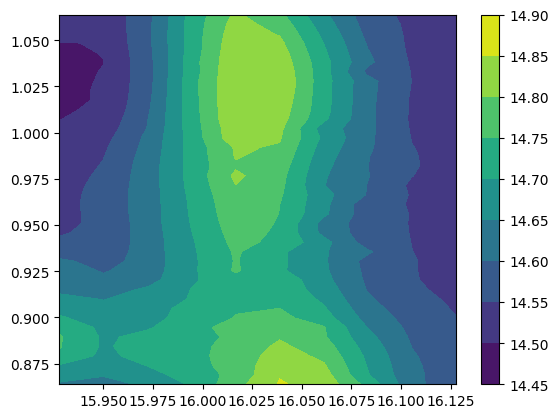

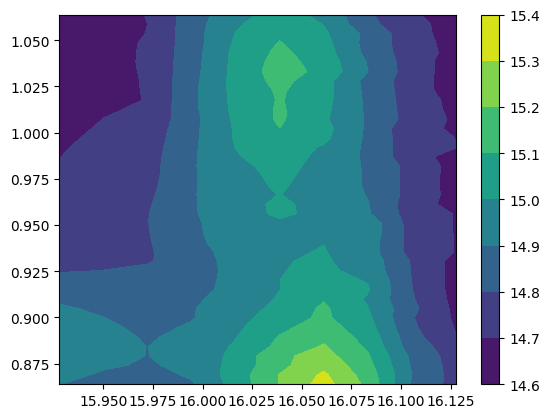

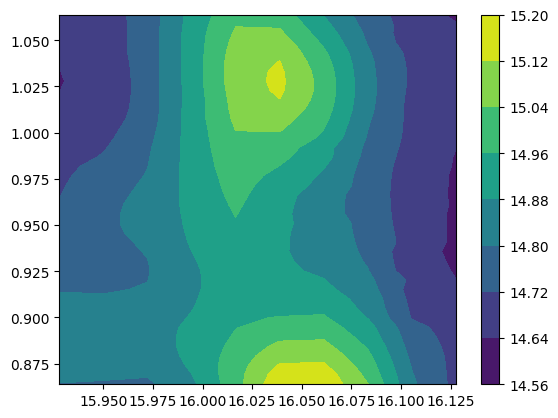

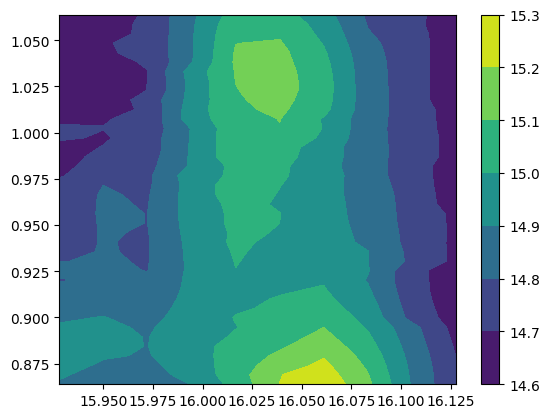

In [109]:
for chroma in chromato_list:
    plot.visualizer(chromato_obj=(chroma, time_rn), mod_time=1.25, points=chromato_cd, casnos_dict=casnos_dict, log_chromato=True, rt1=cyclohexanone_cd[0], rt2=cyclohexanone_cd[1], rt1_window=0.1, rt2_window=0.1)

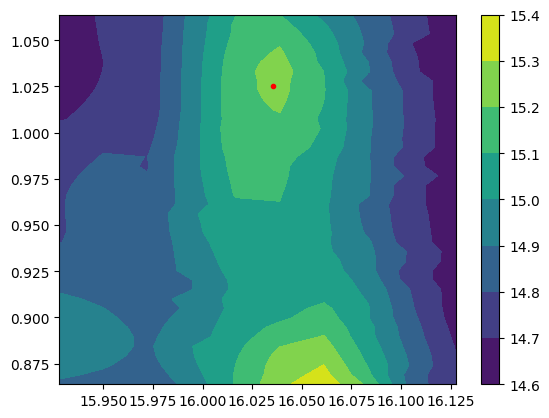

In [125]:
plot.visualizer(chromato_obj=(chromato, time_rn), mod_time=1.25, points=np.array([[16.0355, 1.025]]), rt1=cyclohexanone_cd[0], rt2=cyclohexanone_cd[1], rt1_window=0.1, rt2_window=0.1)

In [126]:
cd_in_matrix = projection.chromato_to_matrix(np.array([[16.0355, 1.025]]), time_rn, 1.25, chromato.shape)

In [127]:
i = mass_spec.read_spectrum_from_chromato_cube(cd_in_matrix[0], chromato_cube)

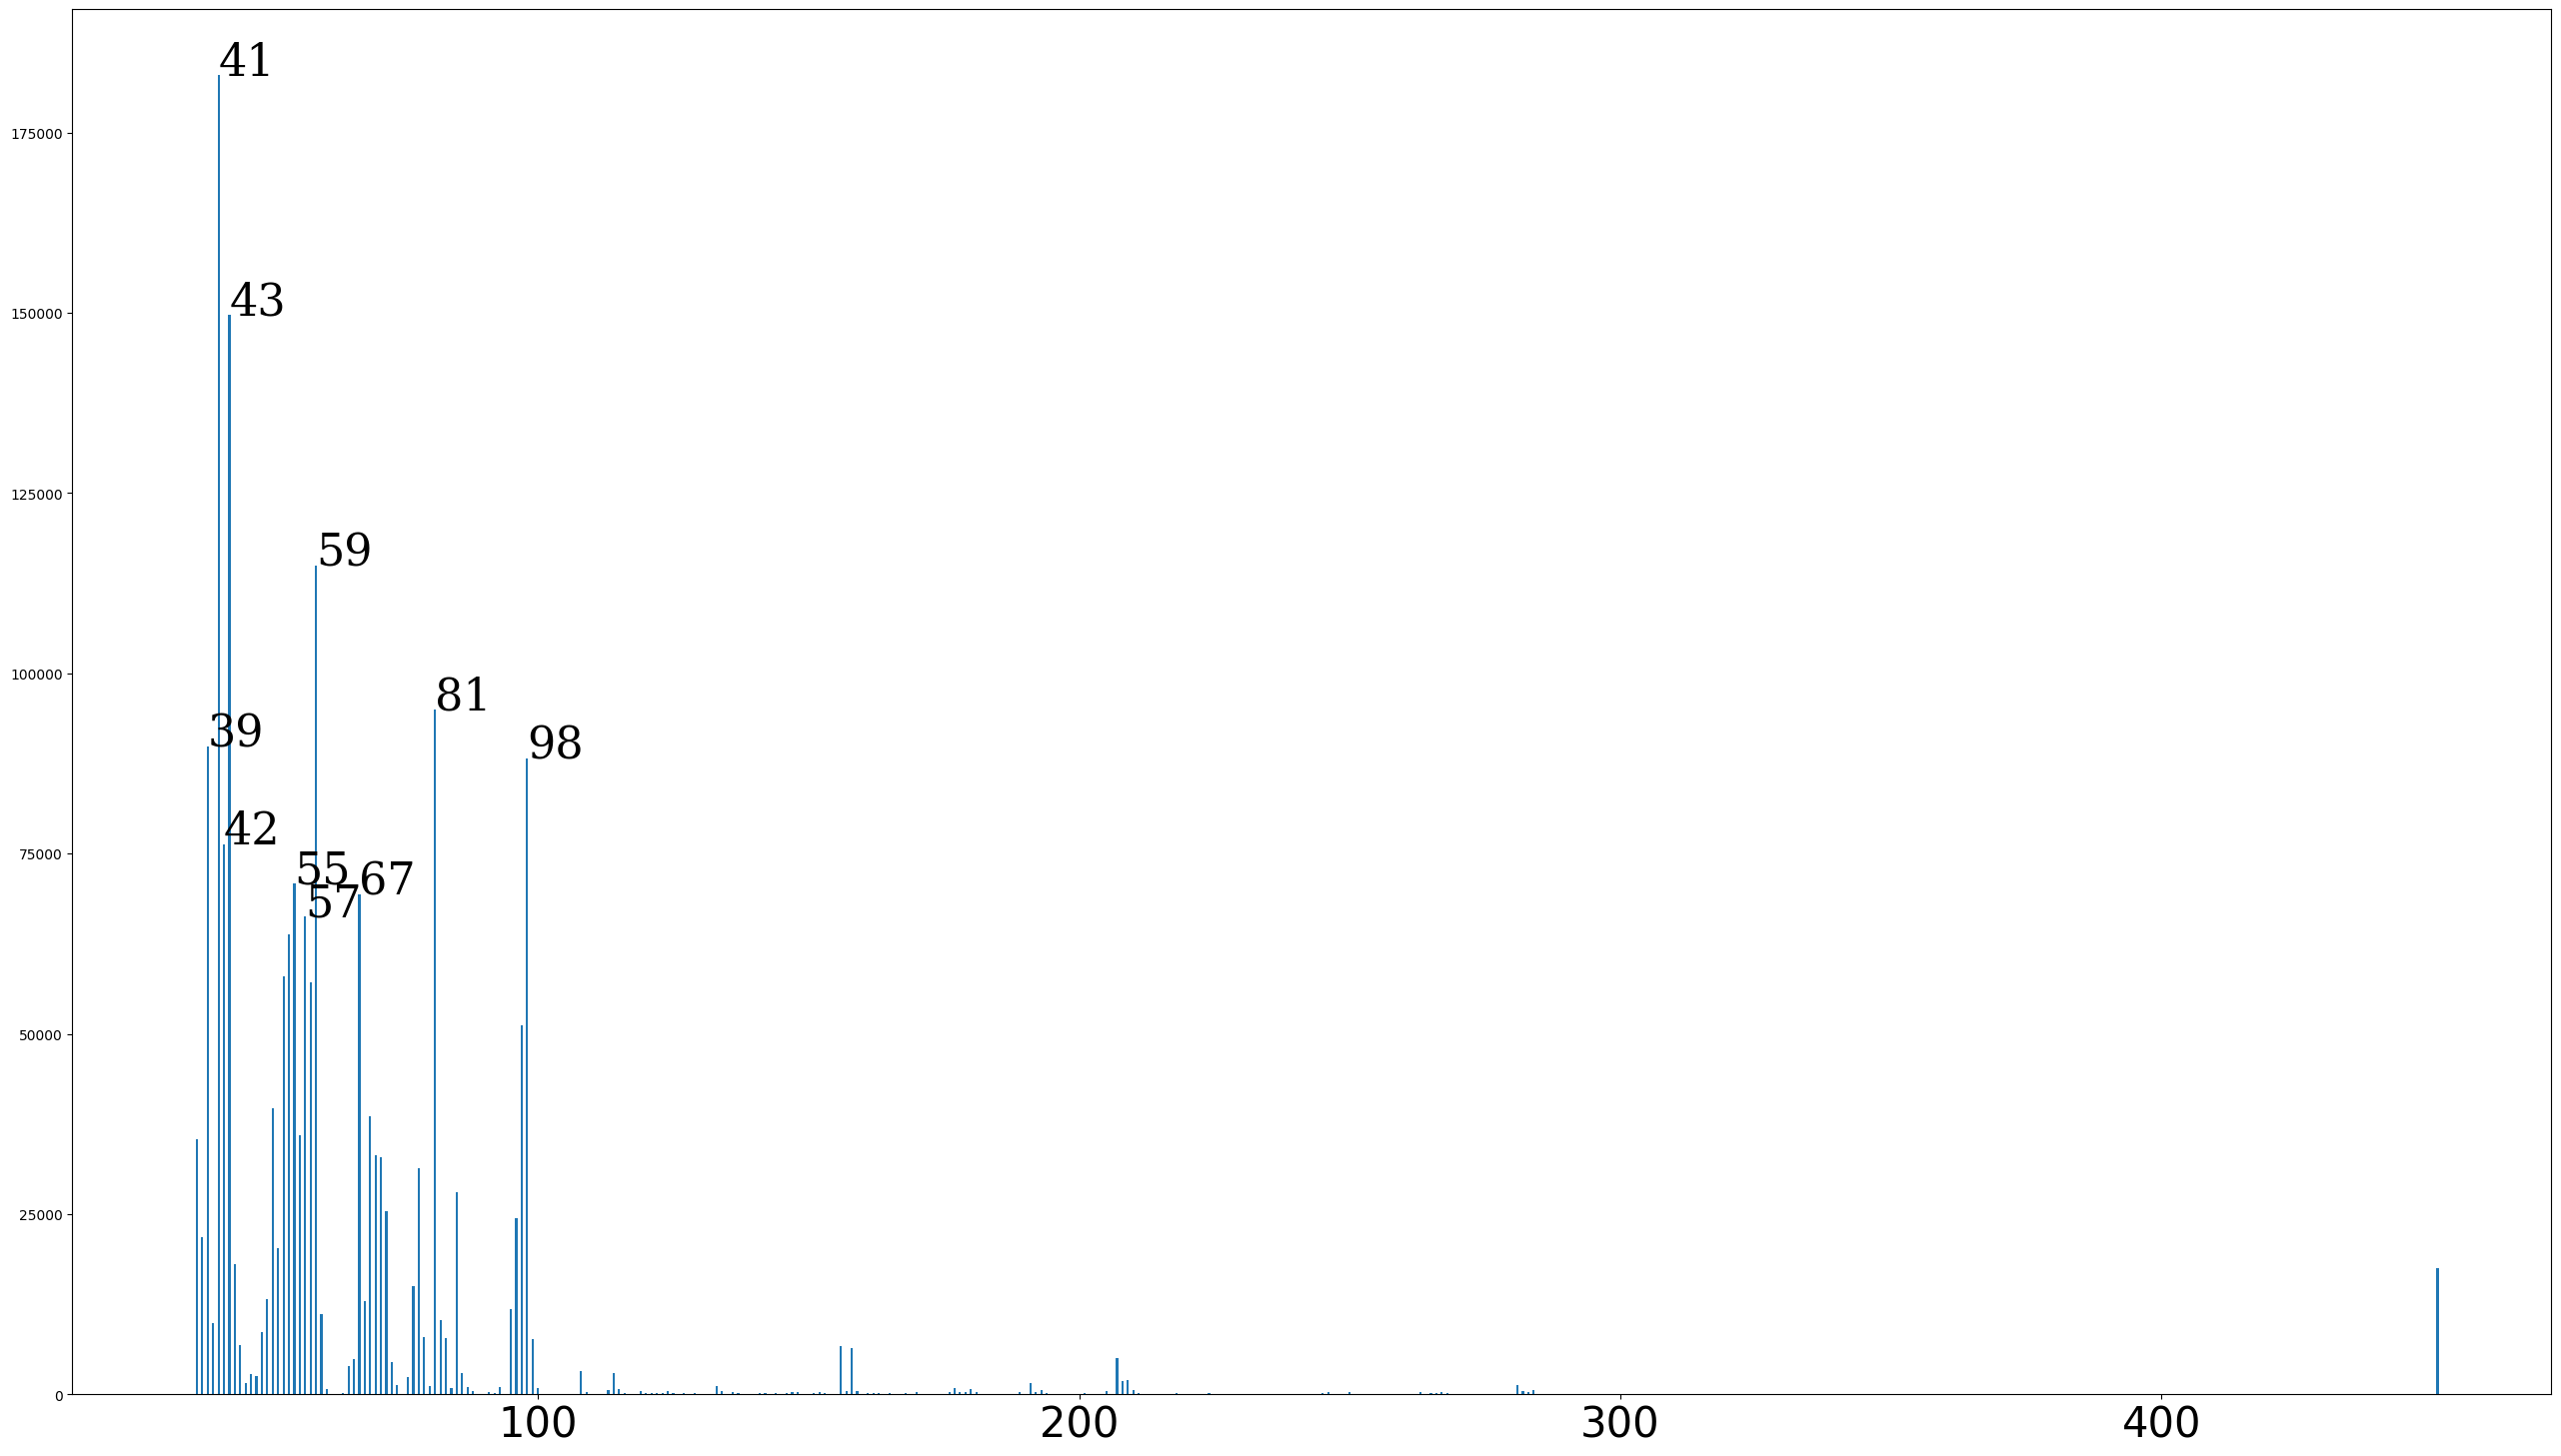

In [128]:
plot.plot_mass(mass_values, i)

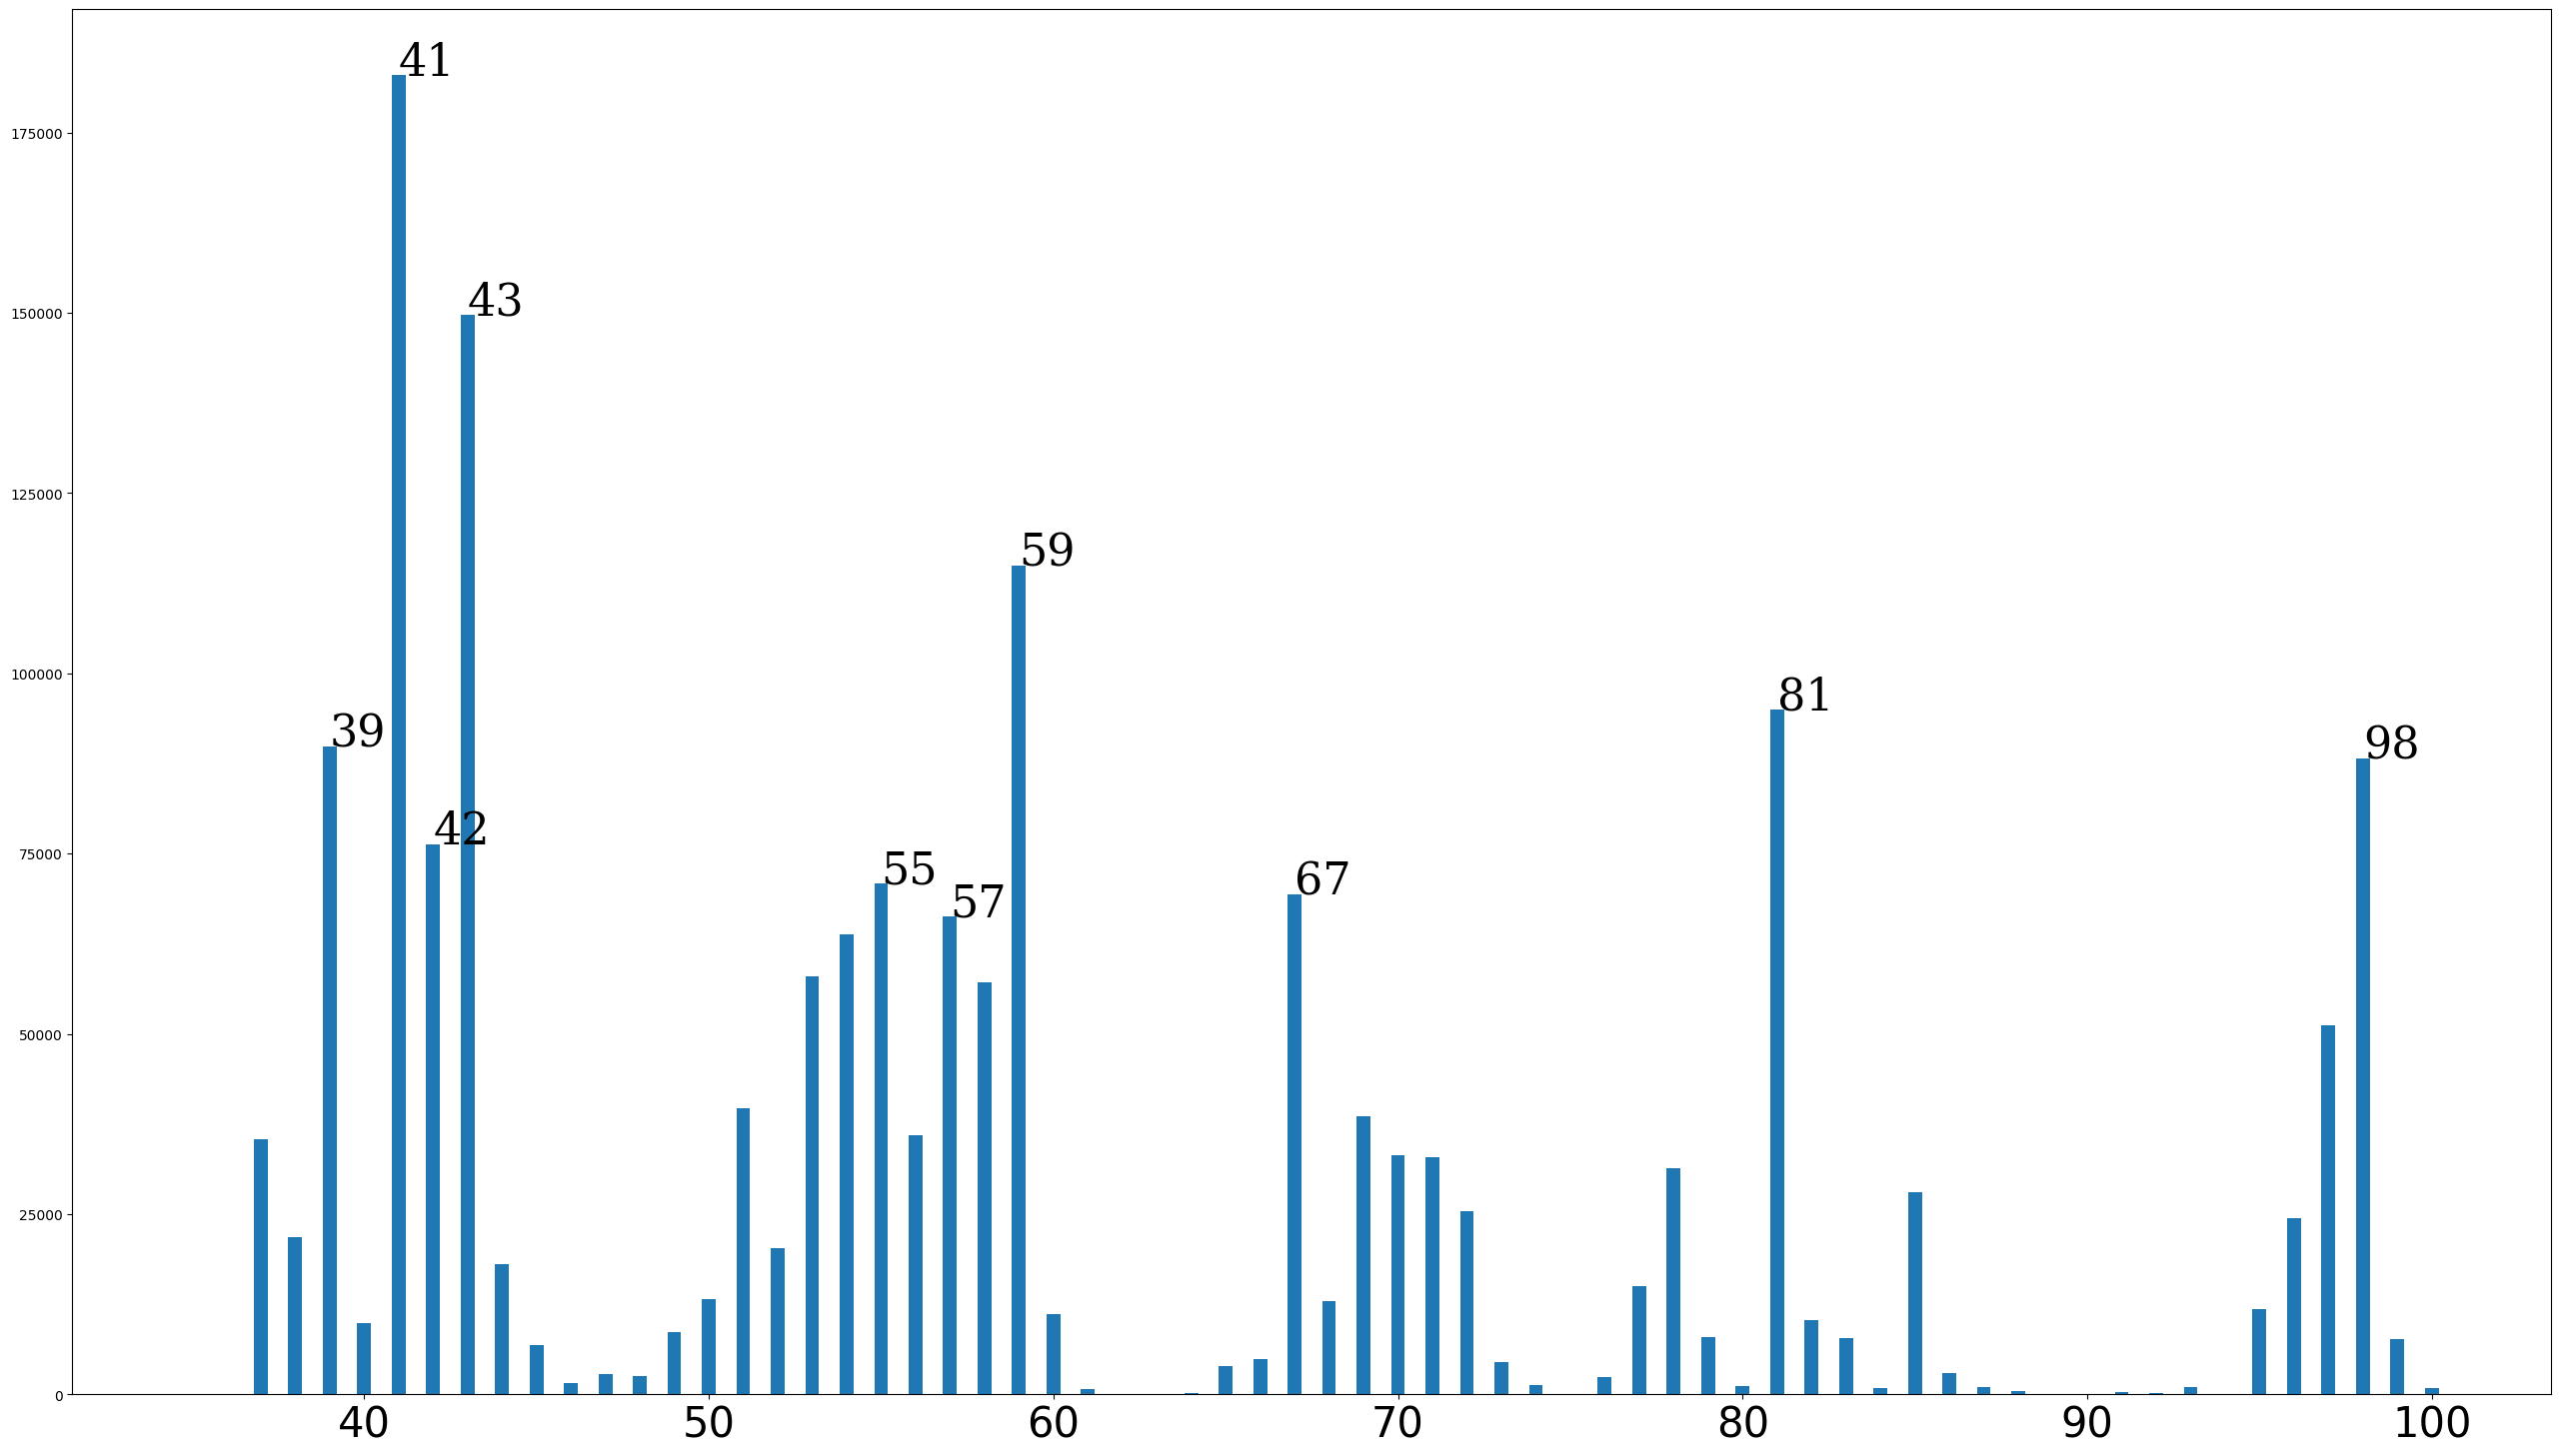

In [129]:
plot.plot_mass(mass_values[:100 + 1 - mass_values[0]], i[:100 + 1 - mass_values[0]])

In [130]:
mass_spectrum = pyms.Spectrum.MassSpectrum(mass_values, i)
res_search_pt = search.full_search_with_ref_data(mass_spectrum)

In [131]:
res_search_pt

[(Search Result: 6-Hepten-3-ol 	(643),
  Reference Data: 6-Hepten-3-ol 	(19781-77-2)),
 (Search Result: 1H-Pyrrole, 2,5-dihydro-1-nitroso- 	(639),
  Reference Data: 1H-Pyrrole, 2,5-dihydro-1-nitroso- 	(10552-94-0)),
 (Search Result: 2,4-Hexadien-1-ol 	(628),
  Reference Data: 2,4-Hexadien-1-ol 	(111-28-4)),
 (Search Result: 6-Nonenal, (Z)- 	(617),
  Reference Data: 6-Nonenal, (Z)- 	(2277-19-2)),
 (Search Result: 9-Oxabicyclo[6.1.0]nonane 	(615),
  Reference Data: 9-Oxabicyclo[6.1.0]nonane 	(286-62-4))]

# Cyclopentanone

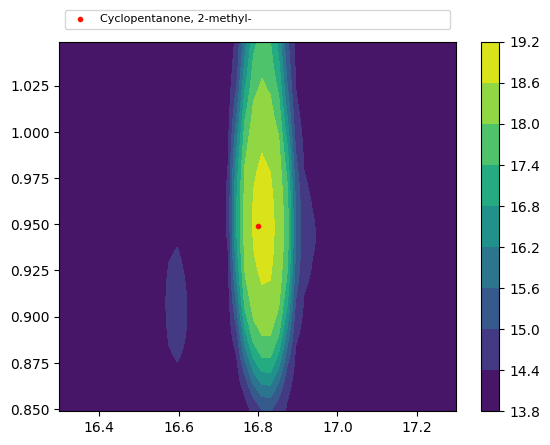

In [169]:
plot.visualizer(chromato_obj=(chromato_m3, time_rn), mod_time=1.25, points=chromato_cd_m3, casnos_dict=casnos_dict3, log_chromato=True, rt1=cyclopentanone_cd[0], rt2=cyclopentanone_cd[1], rt1_window=0.5, rt2_window=0.1)

In [171]:
shuffled_casnos_dict = utils.shuffle_dict(casnos_dict)

c:\Users\Stan\pic\plot.py:383: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')
c:\Users\Stan\pic\plot.py:383: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')


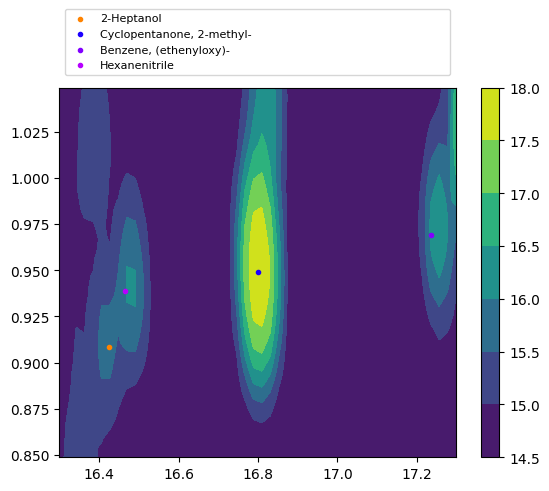

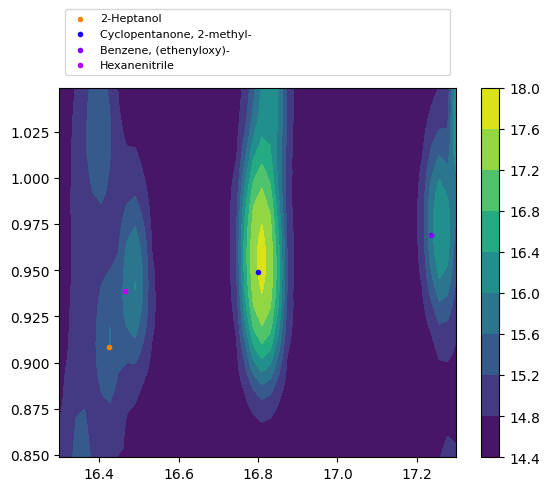

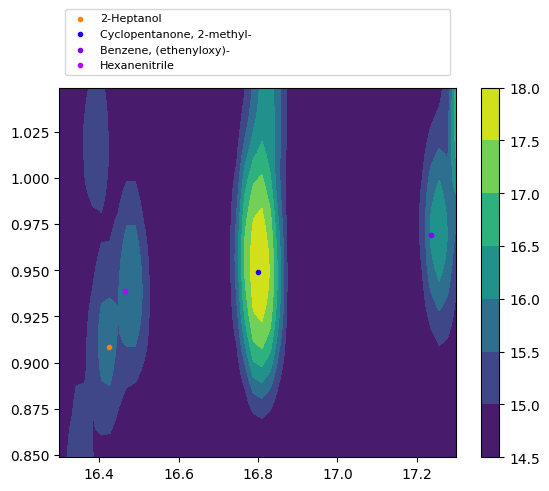

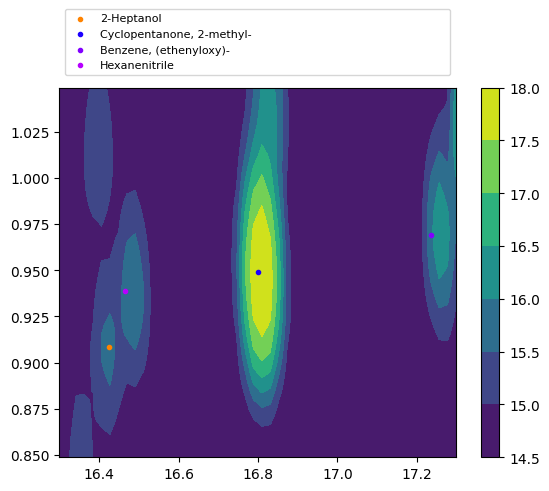

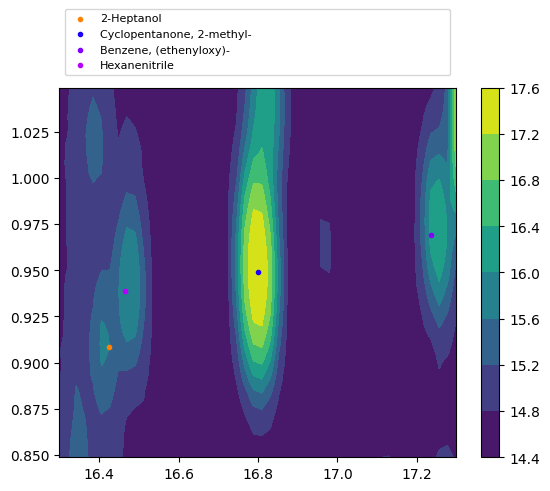

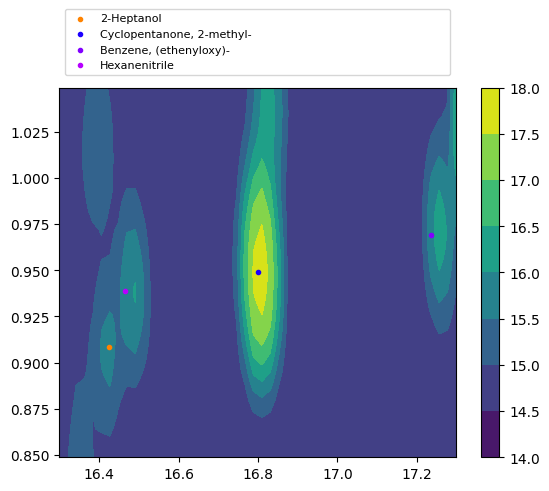

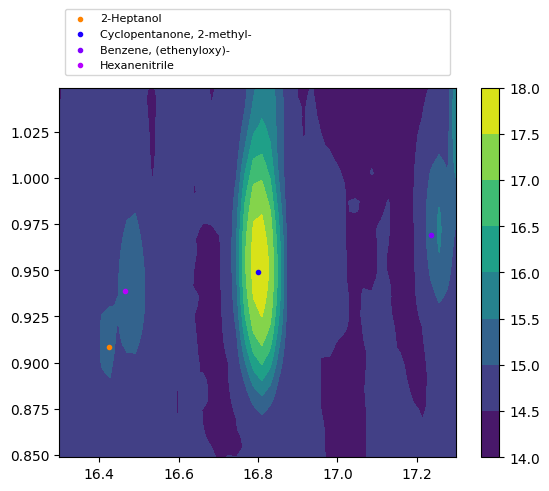

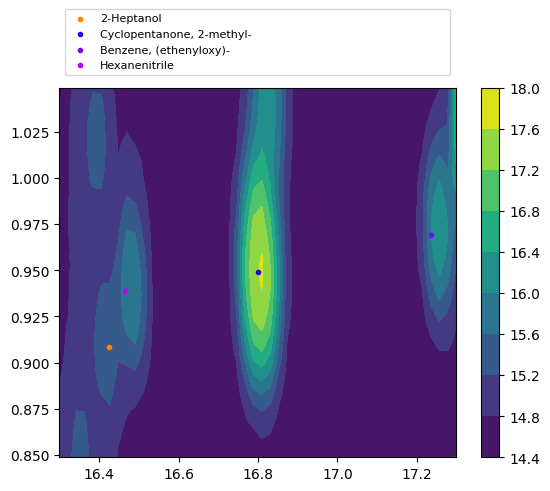

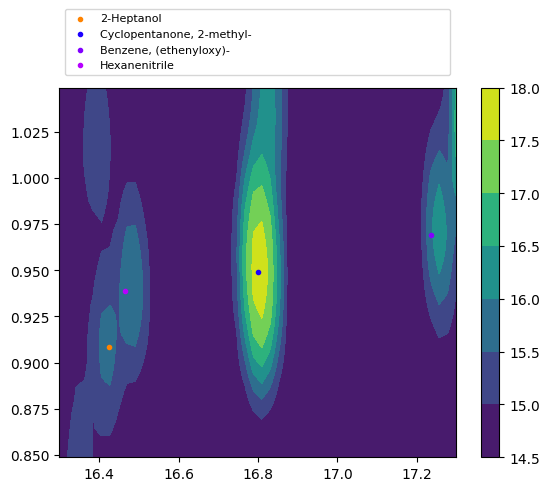

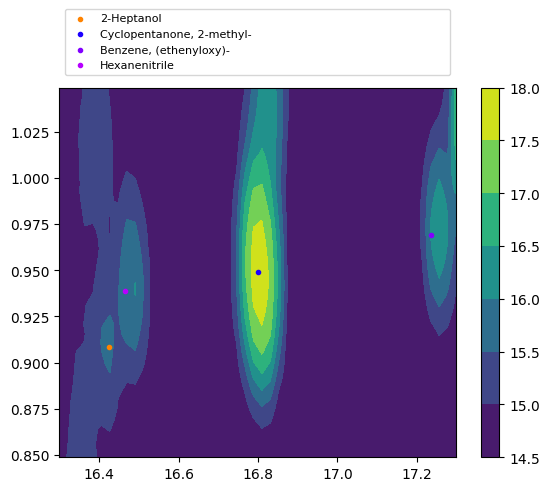

In [172]:
for chroma in chromato_list:
    plot.visualizer(chromato_obj=(chroma, time_rn), mod_time=1.25, points=chromato_cd, casnos_dict=shuffled_casnos_dict, log_chromato=True, rt1=cyclopentanone_cd[0], rt2=cyclopentanone_cd[1], rt1_window=0.5, rt2_window=0.1)